<a href="https://colab.research.google.com/github/Gabriel-R-A/SPOTIFY-SEQUENTIAL-SKIP-PREDICTION-CHALLENGE-/blob/main/TCC_Pipeline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
!tar -xf '/content/drive/MyDrive/TESTE TCC/training mini/16772e7f-7871-4d42-a44f-5f399f40fd94_training_set_track_features_mini'

In [ ]:
track_df = pd.read_csv('data/track_features/tf_mini.csv')

train_df = pd.read_csv('data/training_set/log_mini.csv')

In [ ]:
track_df

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,...,4,0.542063,-0.196001,0.301727,0.238880,-0.391421,0.016690,0.247235,-0.399387,-0.192473
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,...,4,0.472353,-0.545160,0.271596,0.274377,0.043951,-0.322946,0.150802,0.159378,0.384336
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,...,4,0.766519,0.112592,0.368523,-0.466950,-0.468494,0.640088,0.050771,-0.258999,0.258766
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,...,4,0.058505,-0.855291,0.365487,0.273034,0.108294,-0.206204,0.007847,-0.408226,0.143629


In [ ]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [ ]:
train_df

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [ ]:
import pandas as pd

# Juntar os dataframes pelo campo track_id e track_id_clean
merged_df = pd.merge(track_df, train_df, left_on='track_id', right_on='track_id_clean', how='inner')

# Dropar a coluna track_id
merged_df = merged_df.drop('track_id', axis=1)

# Transformar a coluna date em datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Resultado final
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   duration                         167880 non-null  float64       
 1   release_year                     167880 non-null  int64         
 2   us_popularity_estimate           167880 non-null  float64       
 3   acousticness                     167880 non-null  float64       
 4   beat_strength                    167880 non-null  float64       
 5   bounciness                       167880 non-null  float64       
 6   danceability                     167880 non-null  float64       
 7   dyn_range_mean                   167880 non-null  float64       
 8   energy                           167880 non-null  float64       
 9   flatness                         167880 non-null  float64       
 10  instrumentalness                 167880 non-

In [ ]:
# Criar a coluna skipped com base na skip_2
merged_df['skipped'] = merged_df['skip_2'] | merged_df['skip_1']
# Dropar as colunas skip_1, skip_2, skip_3 e not_skipped
merged_df = merged_df.drop(['skip_1', 'skip_2', 'skip_3', 'not_skipped'], axis=1)
# Resultado final
merged_df.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone,False
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone,False
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn,True
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone,False
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay,False


In [ ]:
# Selecionar colunas do tipo objeto
obj_columns = merged_df.select_dtypes(include='object')

# Resultado final
obj_columns

,mode,session_id,track_id_clean,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,major,0_0e4a49d8-688d-4958-94db-5cb56adc3090,t_a540e552-16d4-42f8-a185-232bd650ea7d,user_collection,trackdone,trackdone
1,major,0_0cc4863b-83ff-48cb-afda-f952ad323562,t_67965da0-132b-4b1e-8a69-0ef99b32287c,radio,trackdone,trackdone
2,major,0_0cc4863b-83ff-48cb-afda-f952ad323562,t_67965da0-132b-4b1e-8a69-0ef99b32287c,radio,backbtn,fwdbtn
3,minor,0_061d77c2-5526-43b2-993c-adf4338897ce,t_0614ecd3-a7d5-40a1-816e-156d5872a467,user_collection,trackdone,trackdone
4,major,0_091c94f6-e76b-4b3e-8366-5d9d3c3e2fef,t_070a63a0-744a-434e-9913-a97b02926a29,catalog,trackdone,endplay
...,...,...,...,...,...,...
167875,minor,0_0e4da1cd-bfc1-4eea-894a-6403565863e8,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,user_collection,fwdbtn,fwdbtn
167876,minor,0_0e540401-f4a2-475d-b00b-092cf0df5425,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,user_collection,fwdbtn,fwdbtn
167877,minor,0_0e87b66d-af53-407d-a74f-15fba3524036,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,editorial_playlist,fwdbtn,trackdone
167878,minor,0_0ea2015c-84ff-465e-871d-5be6cce7dc49,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,user_collection,trackdone,trackdone


In [ ]:
# Dropar as colunas session_id e track_id_clean
merged_df = merged_df.drop(['session_id', 'track_id_clean'], axis=1)

# Transformar as colunas restantes em valores numéricos
merged_df = merged_df.apply(pd.to_numeric, errors='ignore')

# Resultado final
merged_df

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,0,0,True,10,1531612800000000000,True,user_collection,trackdone,trackdone,False
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,1531526400000000000,True,radio,trackdone,trackdone,False
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,1531526400000000000,True,radio,backbtn,fwdbtn,True
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,0,0,False,22,1531526400000000000,True,user_collection,trackdone,trackdone,False
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,0,0,False,20,1531526400000000000,True,catalog,trackdone,endplay,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,13,1531612800000000000,False,user_collection,fwdbtn,fwdbtn,True
167876,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,2,1531612800000000000,False,user_collection,fwdbtn,fwdbtn,True
167877,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,True,22,1531526400000000000,True,editorial_playlist,fwdbtn,trackdone,False
167878,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,17,1531612800000000000,False,user_collection,trackdone,trackdone,False


In [ ]:
# Selecionar colunas do tipo objeto
obj_columns = merged_df.select_dtypes(include='object')

# Resultado final
obj_columns

,mode,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,major,user_collection,trackdone,trackdone
1,major,radio,trackdone,trackdone
2,major,radio,backbtn,fwdbtn
3,minor,user_collection,trackdone,trackdone
4,major,catalog,trackdone,endplay
...,...,...,...,...
167875,minor,user_collection,fwdbtn,fwdbtn
167876,minor,user_collection,fwdbtn,fwdbtn
167877,minor,editorial_playlist,fwdbtn,trackdone
167878,minor,user_collection,trackdone,trackdone


In [ ]:
# Transformar as colunas categóricas em valores numéricos
label_encoder = LabelEncoder()
categorical_columns = ['mode', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']
for col in categorical_columns:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

# Resultado final
merged_df

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,0,0,True,10,1531612800000000000,True,5,7,6,False
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,1531526400000000000,True,4,7,6,False
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,False,23,1531526400000000000,True,4,1,3,True
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,0,0,False,22,1531526400000000000,True,5,7,6,False
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,0,0,False,20,1531526400000000000,True,0,7,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,13,1531612800000000000,False,5,4,3,True
167876,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,2,1531612800000000000,False,5,4,3,True
167877,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,True,22,1531526400000000000,True,2,4,6,False
167878,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,False,17,1531612800000000000,False,5,7,6,False


In [ ]:
# Transformar as colunas de booleanos em valores numéricos
bool_columns = ['hist_user_behavior_is_shuffle', 'premium', 'skipped']
merged_df[bool_columns] = merged_df[bool_columns].astype(int)

# Resultado final
merged_df

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,0,0,1,10,1531612800000000000,1,5,7,6,0
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,0,23,1531526400000000000,1,4,7,6,0
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0,0,0,23,1531526400000000000,1,4,1,3,1
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,0,0,0,22,1531526400000000000,1,5,7,6,0
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,0,0,0,20,1531526400000000000,1,0,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,0,13,1531612800000000000,0,5,4,3,1
167876,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,0,2,1531612800000000000,0,5,4,3,1
167877,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,1,22,1531526400000000000,1,2,4,6,0
167878,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,...,0,0,0,17,1531612800000000000,0,5,7,6,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados do seu dataframe
data = merged_df

# Separar as features (X) do target (y)
X = data.drop('skipped', axis=1)
y = data['skipped']

# Instanciar o modelo de classificação Random Forest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Obter a importância das features
feature_importances = rf.feature_importances_

# Criar um dataframe com as features e suas importâncias correspondentes
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar as features por importância decrescente
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Exibir as features mais importantes
feature_importance_df

,Feature,Importance
43,hist_user_behavior_reason_end,0.443567
42,hist_user_behavior_reason_start,0.155507
29,session_position,0.029460
38,hour_of_day,0.026665
30,session_length,0.014112
0,duration,0.011954
2,us_popularity_estimate,0.011928
12,liveness,0.011062
18,tempo,0.010694
41,context_type,0.010660


In [ ]:
# Exibir as features mais importantes
feature_importance_df

,Feature,Importance
43,hist_user_behavior_reason_end,0.443567
42,hist_user_behavior_reason_start,0.155507
29,session_position,0.029460
38,hour_of_day,0.026665
30,session_length,0.014112
0,duration,0.011954
2,us_popularity_estimate,0.011928
12,liveness,0.011062
18,tempo,0.010694
41,context_type,0.010660


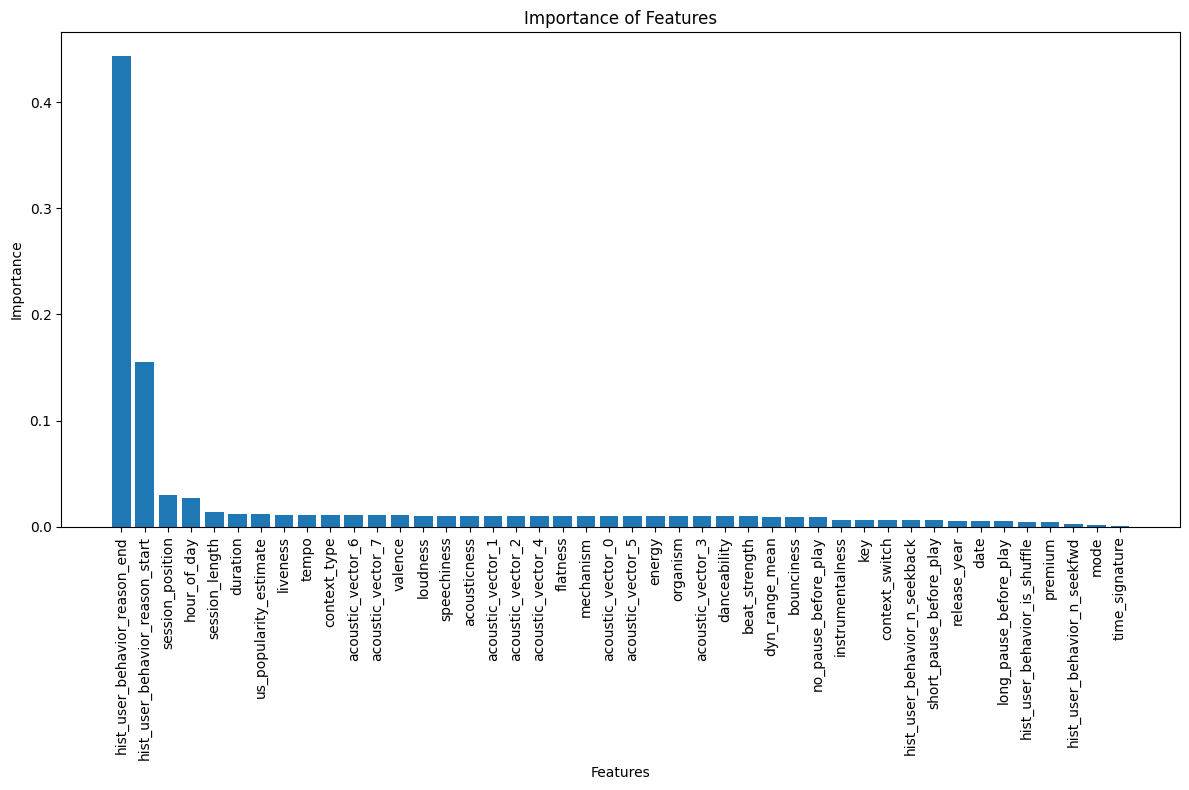

In [ ]:
import matplotlib.pyplot as plt

# Dados das features e importâncias
features = feature_importance_df['Feature']
importances = feature_importance_df['Importance']

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Features')
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px

# Assuming you have feature_importance_df with 'Feature' and 'Importance' columns

fig = px.bar(
    feature_importance_df,
    x='Feature',
    y='Importance',
    labels={'Feature': 'Features', 'Importance': 'Importance'},
    title='Importance of Features',
    width=1000,  # Set the width of the chart
    height=600   # Set the height of the chart
)

fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[LightGBM] [Info] Number of positive: 86824, number of negative: 81056
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6611
[LightGBM] [Info] Number of data points in the train set: 167880, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517179 -> initscore=0.068743
[LightGBM] [Info] Start training from score 0.068743


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


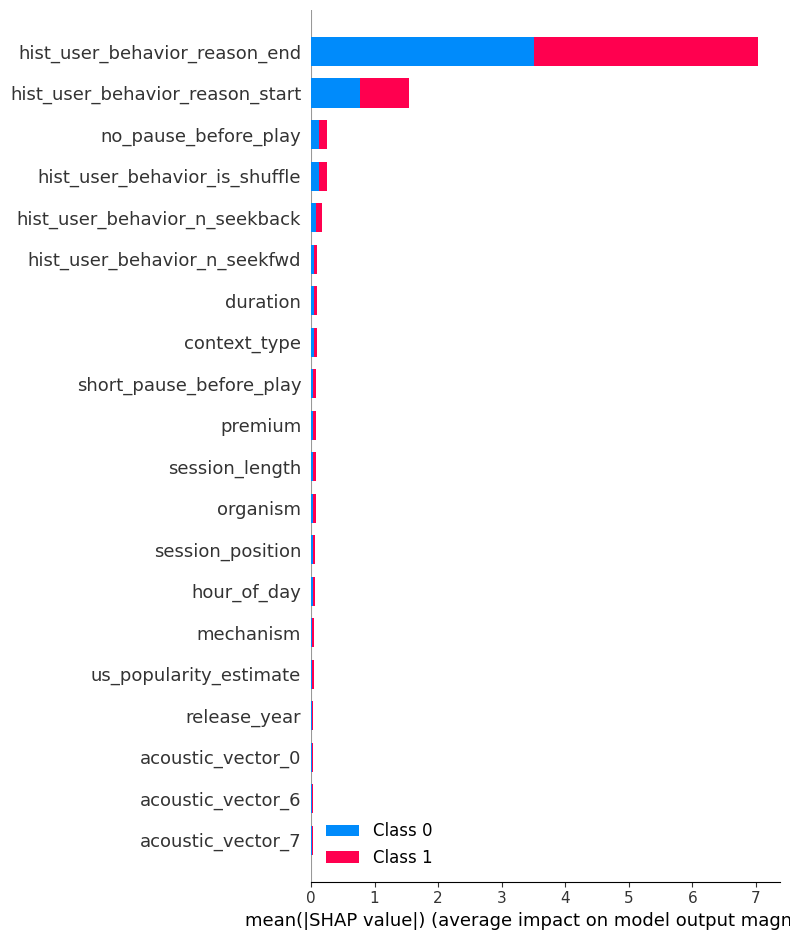

In [ ]:
import lightgbm as lgb
import shap

# Separar os dados de features (X) e o alvo (y)
X = merged_df.drop('skipped', axis=1)
y = merged_df['skipped']

# Treinar o modelo LightGBM
model = lgb.LGBMClassifier()  # Substitua por LGBMRegressor se for um problema de regressão
model.fit(X, y)

# Calcular os valores SHAP para todas as amostras
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

# Plotar o resumo do SHAP
shap.summary_plot(shap_values, X)

In [ ]:
import numpy as np

# Calcular os valores SHAP para todas as amostras
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Verificar a estrutura dos valores SHAP
print(len(shap_values))  # Deve ser 2 para classificação binária
print(shap_values[0].shape)  # Deve ter dimensões (n_samples, n_features)
print(shap_values[1].shape)  # Deve ter dimensões (n_samples, n_features)


2
(167880, 44)
(167880, 44)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
# Dropar as colunas session_id e track_id_clean
merged_df = merged_df.drop(['time_signature', 'mode', 'time_signature'], axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   duration                         167880 non-null  float64
 1   release_year                     167880 non-null  int64  
 2   us_popularity_estimate           167880 non-null  float64
 3   acousticness                     167880 non-null  float64
 4   beat_strength                    167880 non-null  float64
 5   bounciness                       167880 non-null  float64
 6   danceability                     167880 non-null  float64
 7   dyn_range_mean                   167880 non-null  float64
 8   energy                           167880 non-null  float64
 9   flatness                         167880 non-null  float64
 10  instrumentalness                 167880 non-null  float64
 11  key                              167880 non-null  int64  
 12  li

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Carregar seu DataFrame
df = merged_df

# Separar as features (X) e o alvo (y)
X = df.drop('skipped', axis=1)
y = df['skipped']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
diferenca = y.value_counts()

total = len(y)
print(total)
# Calcule a contagem de cada valor
diferenca = y.value_counts()
print(diferenca)
# Calcule a porcentagem de cada valor em relação ao total
porcentagem = (diferenca / total) * 100

# Formate as porcentagens como strings com símbolo de porcentagem
formatted_percentages = porcentagem.apply(lambda x: f'{x:.2f}%')

# Exiba as porcentagens formatadas
print(formatted_percentages)

167880
1    86824
0    81056
Name: skipped, dtype: int64
1    51.72%
0    48.28%
Name: skipped, dtype: object


In [ ]:
# Definir o pipeline para cada modelo
pipelines = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Decision Tree', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ])),
    ('Random Forest', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])),
    ('Gradient Boosting', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier())
    ])),
    ('Support Vector Machine', Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))  # Habilitar a probabilidade
    ])),
    ('Naive Bayes', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])),
    ('XGBoost', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', xgb.XGBClassifier())
    ]))
]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     16239
           1       0.82      0.93      0.88     17337

    accuracy                           0.86     33576
   macro avg       0.87      0.86      0.86     33576
weighted avg       0.87      0.86      0.86     33576




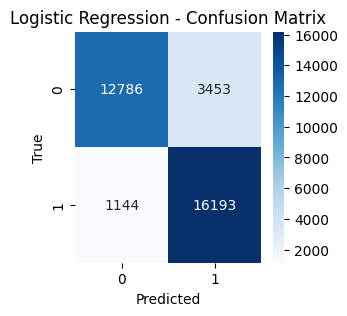

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     16239
           1       0.84      0.83      0.83     17337

    accuracy                           0.83     33576
   macro avg       0.83      0.83      0.83     33576
weighted avg       0.83      0.83      0.83     33576




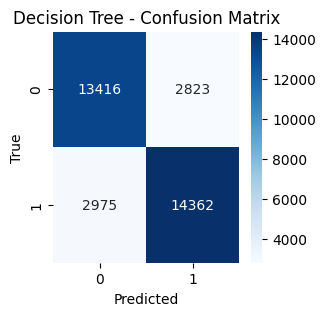

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     16239
           1       0.85      0.91      0.88     17337

    accuracy                           0.87     33576
   macro avg       0.87      0.87      0.87     33576
weighted avg       0.87      0.87      0.87     33576




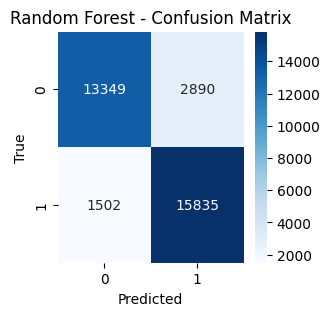

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     16239
           1       0.84      0.93      0.88     17337

    accuracy                           0.87     33576
   macro avg       0.88      0.87      0.87     33576
weighted avg       0.88      0.87      0.87     33576




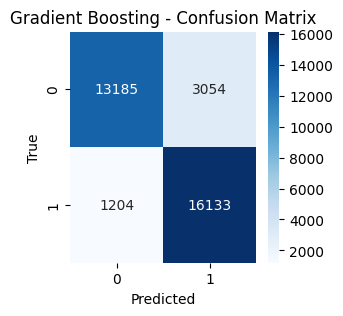

Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     16239
           1       0.84      0.92      0.88     17337

    accuracy                           0.87     33576
   macro avg       0.88      0.87      0.87     33576
weighted avg       0.87      0.87      0.87     33576




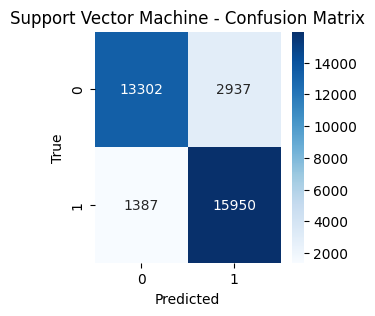

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     16239
           1       0.82      0.90      0.86     17337

    accuracy                           0.85     33576
   macro avg       0.85      0.85      0.85     33576
weighted avg       0.85      0.85      0.85     33576




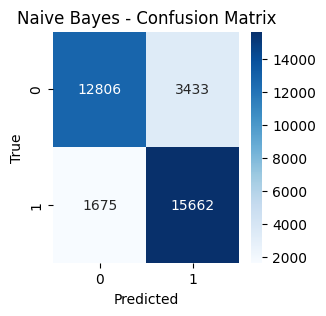

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     16239
           1       0.85      0.92      0.88     17337

    accuracy                           0.87     33576
   macro avg       0.88      0.87      0.87     33576
weighted avg       0.88      0.87      0.87     33576




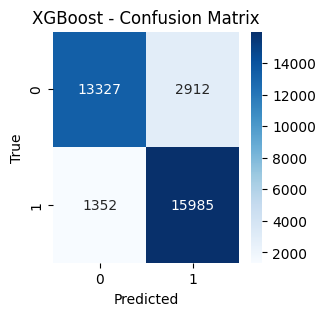

In [ ]:

# Treinar e avaliar cada modelo
for model_name, pipeline in pipelines:
    fig, axes = plt.subplots(figsize=(3, 3))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} - Classification Report:\n{report}\n')
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

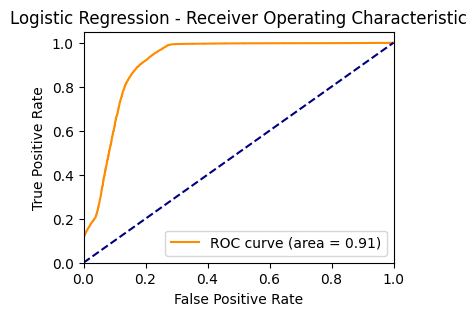

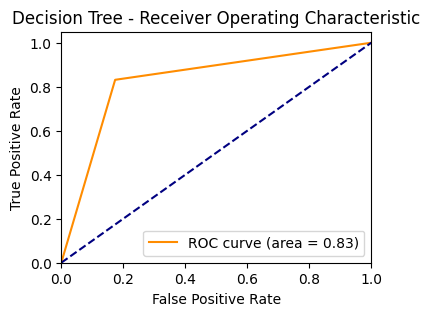

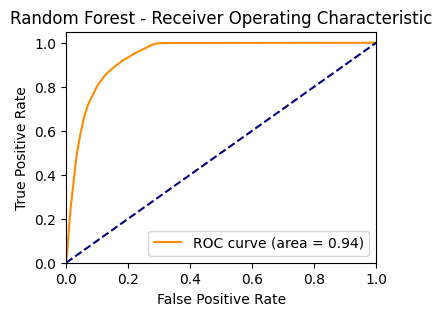

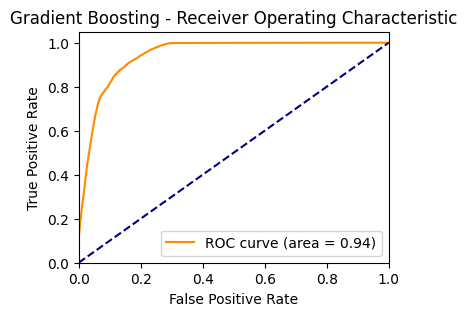

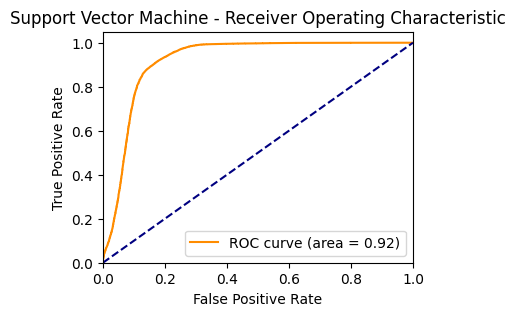

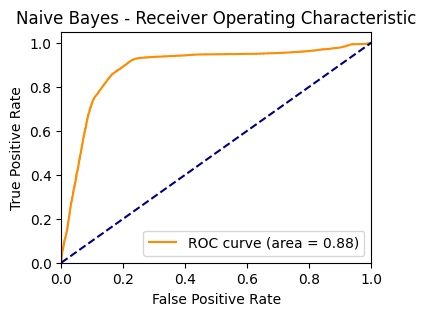

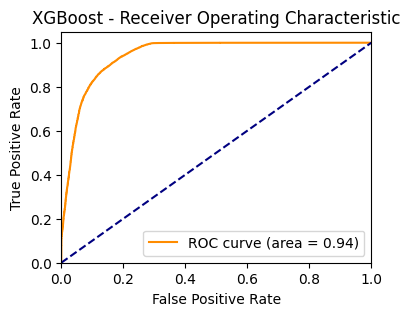

In [ ]:
# Treinar e avaliar cada modelo
for model_name, pipeline in pipelines:
    fig, axes = plt.subplots(figsize=(4, 3))  # Definir o tamanho da figura
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Epoch 1/50
1679/1679 [==============================] - 9s 4ms/step - loss: 0.4689 - accuracy: 0.8497 - val_loss: 0.3174 - val_accuracy: 0.8636
Epoch 2/50
1679/1679 [==============================] - 8s 5ms/step - loss: 0.3242 - accuracy: 0.8668 - val_loss: 0.3045 - val_accuracy: 0.8691
Epoch 3/50
1679/1679 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.8681 - val_loss: 0.3056 - val_accuracy: 0.8715
Epoch 4/50
1679/1679 [==============================] - 7s 4ms/step - loss: 0.3081 - accuracy: 0.8692 - val_loss: 0.2959 - val_accuracy: 0.8717
Epoch 5/50
1679/1679 [==============================] - 8s 5ms/step - loss: 0.3051 - accuracy: 0.8696 - val_loss: 0.2937 - val_accuracy: 0.8697
Epoch 6/50
1679/1679 [==============================] - 7s 4ms/step - loss: 0.3033 - accuracy: 0.8695 - val_loss: 0.2907 - val_accuracy: 0.8722
Epoch 7/50
1679/1679 [==============================] - 8s 5ms/step - loss: 0.3016 - accuracy: 0.8698 - val_loss: 0.2890 - val_accuracy:

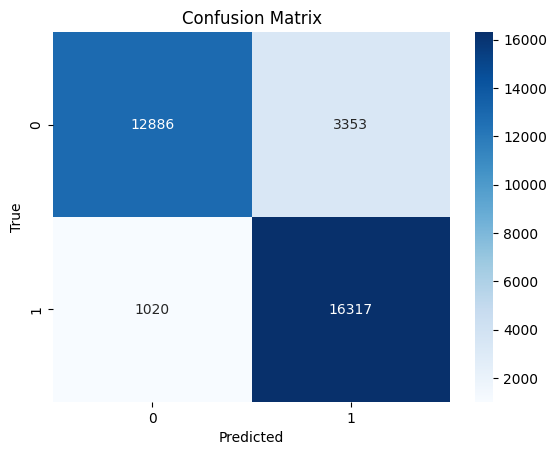

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criação do modelo de Deep Learning
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Avaliação do modelo
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred)
print(report)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()